In [1]:
%matplotlib inline
from pymongo import MongoClient
from pymongo.collection import Collection
import yaml
import pprint

### MAKING A CONNECTION

You will need to load the config.yaml file with the correct information. [See `config.yaml.example`](./config.yaml.example).

In [2]:
with open("./config.yaml") as f:
    conf = yaml.load(f)

In [3]:
client = MongoClient(
    conf['db'],
    **conf['creds']
)

### TESTING OUR CONNECTION
Let's test our connection.

In [4]:
col_notebooks = client.nbmeta.notebooks

In [5]:
c = col_notebooks.aggregate(
    [
     {"$match":
      {
          "repository": "ELLIOTTCABLE/Homework"
      }
     },
     {"$limit": 10
     }
    ]
)


In [6]:
[(c_['path'], c_['sha']) for c_ in c]

[('CS331/AVLTree.ipynb', 'b3875b5b008b6ad4377a11ef40f49225ad3391ef'),
 ('CS331/BSTree.ipynb', '8615d85c68efc4962dc54f859f5e507502b6cca8'),
 ('CS331/CircQueue.ipynb', '38a23e87ede573f7f44ac5acbded21c33a47fd56'),
 ('CS331/Heaps.ipynb', 'fba8599d1080d42b64c462e56e092baa5193fd98'),
 ('CS331/Iocane.ipynb', 'a66263b470ec315247a1c0188afc633e8d571254'),
 ('CS331/N-grams.ipynb', '02c6faea5543e260038e4417979c889c065bc3cd'),
 ('CS331/Recursion.ipynb', '2e7d1c91ebc1a9609bde611156805df01646f321'),
 ('CS331/linkedlist.ipynb', '7a8f855acb5f89da8e23ffa5d40a94cf3d854e59'),
 ('CS331/stack-apps.ipynb', '85ea8a3e84c2c97f0453f300f675636ab8af96b3')]

Looks good!

### GROUPING NOTEBOOKS
Not let's group all repos and get their aggregate counts _by repo_. 

In [7]:
c = col_notebooks.aggregate(
    [
        {"$unwind": "$repository"},
        {"$sortByCount": "$repository"}
    ]
)

data = [c_ for c_ in c]

In [8]:
import pandas as pd
df = pd.DataFrame(data)

### LET'S PLOT THE TOP 20 REPOS BY NUMBER OF `.ipynb` FILES

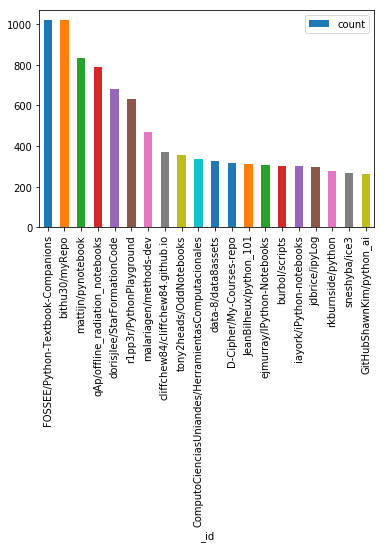

In [9]:
df[:20].plot(kind='bar', x='_id', y='count')

In [10]:
df.to_csv("./10182018_repo_ipynb_counts.csv")